<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/03_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**

K-Means clustering is method of unsupervised learning which attempts to split data into K groups which are near to a centroid (this groups also are called clusters).
This methods could be used to classified the place where are located milloniares in a city, detect areas of crimes, cluster documents according to different categories, classify music, between other applications.

**How does it work?**
* This choose ramdomly K centroids
* Assing to each centroid points in our data, those whose are closest to.
* Then recompute the centroids based on the average posirion of each centroid's points.
* Do the same until the assignments to the centroids stop.

**Some issues with K-means**

* If we choose different centroids, it can yield to different results, so it is a good idea to run this several times to make you sure.
* The cluster that you obtain does not have any sense until you study deeply the information related to this clusters.

## **Example**

In [10]:
#Importing libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
#from numpy import random, float

### 1. First we are going to create a random dataset with 100 elements:

In [30]:
# Generate random array of size 100x2
np.random.seed(3)
data = np.random.randint(low=0, high=1000, size=(100, 2))
data[0:3]

array([[874, 664],
       [249, 643],
       [952, 968]])

The data behaves as follows

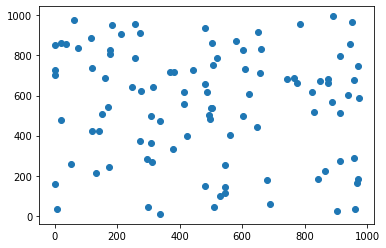

In [31]:
plt.scatter(data[:,0], data[:,1])

The idea is to find four clusters according to the random dataset generated with numpy. And so on, we generate the clusters described by means a number according to the assignment. This information can be recovered with `model.labels_`

In [47]:
# Calling the K-Means model with 4 cluster
model = KMeans(n_clusters=4)

# In order to have good results, we have to standarized the data along any axis
scaleData=scale(data)
model = model.fit(scaleData)

# To each cluster is given a number, the following show how this assignment behaves.
assigments= model.labels_
print('Assginment to each cluster:', model.labels_)

# The cluster centers
centroids=model.cluster_centers_
print("Cluster Centers:", model.cluster_centers_)

Assginment to each cluster: [0 3 0 3 0 0 0 1 0 0 1 0 1 0 3 3 0 0 0 3 1 0 1 1 3 3 2 3 0 0 3 1 0 3 2 0 2
 3 3 0 0 0 0 0 2 2 2 1 1 2 1 0 1 3 0 3 2 1 0 3 0 1 3 1 0 3 1 3 3 3 1 3 3 2
 2 1 1 0 3 2 3 1 0 3 2 0 0 1 0 0 0 2 2 2 1 0 0 1 2 2]
Cluster Centers: [[730.69444444 698.97222222]
 [234.40909091 334.5       ]
 [733.29411765 165.76470588]
 [202.48       796.48      ]]


We can classify a dataset according to different cluster, we need to take care when we standarized the data; due to if we want to write the centroids, could be more difficult to described then according to the model generated with standirezed data. We describe the information using the standarized data and plot it:

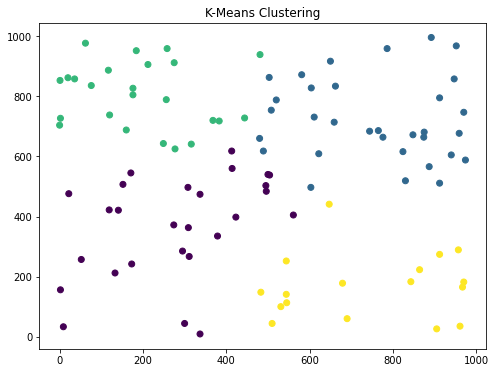

In [50]:
# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.title('K-Means Clustering')
plt.show()

With the information without standarized we can plot the centroids using:

Assginment to each cluster: [1 2 1 2 1 1 1 0 1 1 0 0 0 1 2 2 1 1 1 0 0 1 0 0 2 2 0 2 0 1 2 0 1 2 3 1 3
 2 2 1 1 1 1 1 3 3 3 0 0 3 0 1 0 2 1 2 3 0 1 2 1 0 2 0 0 2 0 2 2 2 0 2 2 3
 3 0 0 1 2 3 2 0 3 2 3 1 1 0 1 1 1 3 3 3 0 1 1 0 3 3]
Cluster Centers: [[282.59259259 369.        ]
 [754.96875    723.15625   ]
 [193.70833333 803.91666667]
 [738.35294118 167.88235294]]


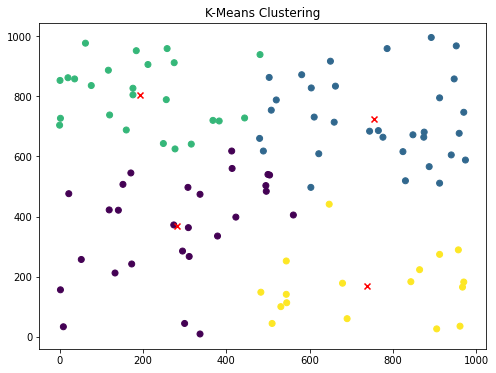

In [49]:
# Calling the K-Means model with 4 cluster
model = KMeans(n_clusters=4)

# In order to do an easy plot of the centroids we can use the data without standarized
model = model.fit(data)

# To each cluster is given a number, the following show how this assignment behaves.
assigments= model.labels_
print('Assginment to each cluster:', model.labels_)

# The cluster centers
centroids=model.cluster_centers_
print("Cluster Centers:", model.cluster_centers_)

# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', c='red')
plt.title('K-Means Clustering')
plt.show()

### 2. Let generated some distinguised groups in order to find its classification, and to see the power of K-means model.